## Error Analysis and Visualisation for XGBoost Models

### Check running python kernel

In [1]:
!which python

/home/smose_roshni/miniconda3/envs/ml-fuel/bin/python


### Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import glob
import os
from sklearn.metrics import r2_score

### Top Level Constants

In [3]:
drop_columns = ['lon', 'lat', 'APE']
HIGH_THRESHOLD = 1e10
result_dir = '../../data/midlats/results'
model_type = 'midlats'

### Inference Files

In [4]:
FILE_PATHS = os.path.join(result_dir, '*'+model_type+'*.csv')
FILE_NAMES = glob.glob(FILE_PATHS)
print(FILE_NAMES)

['../../data/midlats/results/midlats_output_Nov.csv', '../../data/midlats/results/midlats_output_July.csv', '../../data/midlats/results/midlats_output_Dec.csv', '../../data/midlats/results/midlats_output_Aug.csv', '../../data/midlats/results/midlats_output_Oct.csv', '../../data/midlats/results/midlats_output_Sept.csv']


### Make Dataframe

In [5]:
fli_df = pd.concat((pd.read_csv(f, index_col=False).reset_index(drop=True) for f in FILE_NAMES), ignore_index=True)

In [6]:
fli_df

,lat,lon,actual_load,predicted_load,APE
0,-39.375,-63.625,2.970057e+08,1.630175e+08,45.113001
1,-35.125,-66.375,4.184676e+07,5.895562e+07,40.884562
2,-35.125,-66.125,2.375632e+06,5.633218e+07,2271.250540
3,-34.875,-66.375,2.128717e+07,7.795794e+07,266.220335
4,-34.625,116.875,2.648223e+09,5.488961e+08,79.273038
...,...,...,...,...,...
3190,66.625,75.625,3.478482e+08,2.310541e+08,33.576187
3191,66.625,75.875,1.281838e+08,2.189776e+08,70.830989
3192,66.875,76.875,1.696970e+08,2.090306e+08,23.178769
3193,66.875,77.125,1.226333e+08,1.452282e+08,18.424713


### Stats

In [7]:
actual_mean = fli_df['actual_load'].mean()
actual_median = fli_df['actual_load'].median()
print("Actual Fuel Load mean - {actual_mean} and median - {actual_median}".format(actual_mean = actual_mean, actual_median = actual_median))

Actual Fuel Load mean - 1305540849.2961786 and median - 281319932.2625427


In [8]:
Predicted_mean = fli_df['predicted_load'].mean()
Predicted_median = fli_df['predicted_load'].median()
print("Predicted Fuel Load mean - {Predicted_mean} and median - {Predicted_median}".format(Predicted_mean = Predicted_mean, Predicted_median = Predicted_median))

Predicted Fuel Load mean - 1221561703.7125401 and median - 237576083.4320855


### $R^2$ Score 
More details [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [9]:
r2_score(fli_df['actual_load'], fli_df['predicted_load'])

0.3695672819941448

### General Trend of Actual and Predicted Values

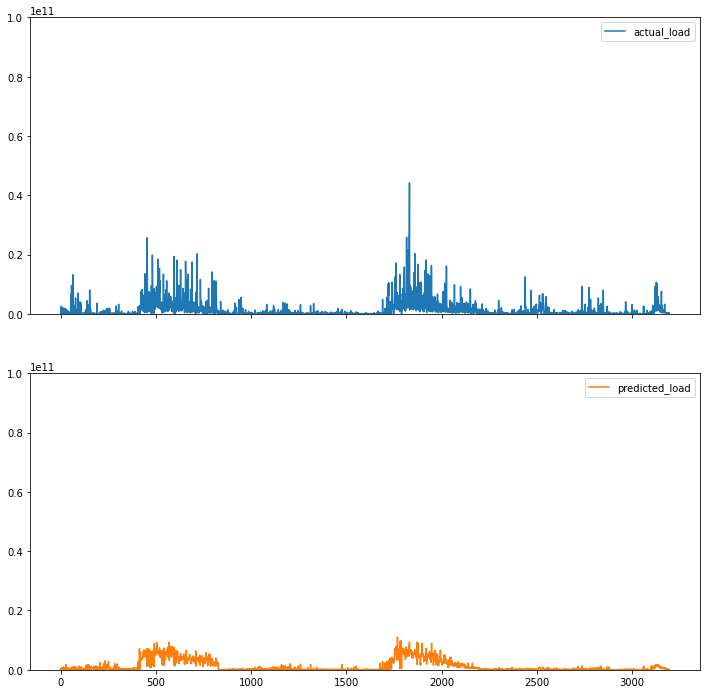

In [10]:
axes = fli_df.drop(columns=drop_columns).plot(subplots = True, figsize=(12, 12))
for ax in axes:
    ax.set_ylim(0, 1e11)

### Distribution of high values (> HIGH_THRESHOLD)

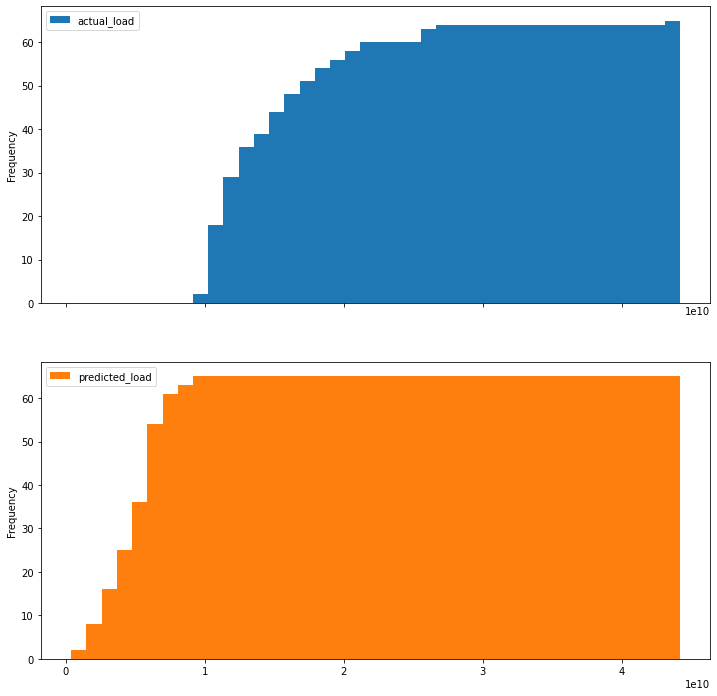

In [11]:
fli_df_high = fli_df[fli_df['actual_load'] >= HIGH_THRESHOLD].reset_index(drop=True)
axes = fli_df_high.drop(columns=drop_columns).plot.hist(bins=40, 
                                                        subplots=True, 
                                                        figsize=(12, 12), 
                                                        cumulative=True)

### Error Stats

In [12]:
fli_err = fli_df.drop(columns=['lat', 'lon', 'predicted_load', 'actual_load'])

In [13]:
fli_err.max()

APE    107264.800846
dtype: float64

In [14]:
fli_err.mean()

APE    251.692942
dtype: float64

In [15]:
fli_err.median()

APE    66.110186
dtype: float64